In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Input, BatchNormalization

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
edges = pd.read_csv("/content/drive/MyDrive/Projekt_SSN/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
features = pd.read_csv("/content/drive/MyDrive/Projekt_SSN/elliptic_bitcoin_dataset/elliptic_txs_features.csv",header=None)
classes = pd.read_csv("/content/drive/MyDrive/Projekt_SSN/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")

In [ ]:
features.rename(columns = {0:'txId1'}, inplace = True)
features = pd.merge(features, edges.groupby('txId1').count(), on="txId1", how="left")
features.head()

,txId1,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,txId2
0,230425980,1,-0.056189,-0.175567,-1.185821,-0.186390,-0.046514,-0.167505,-0.101009,-0.133295,...,-0.582752,1.442895,1.440189,0.003514,-0.092606,-0.135784,-0.101068,-0.102834,-0.102128,1.0
1,5530458,1,-0.056193,-0.175567,-1.185821,-0.186390,-0.046514,-0.167505,-0.101009,-0.133311,...,0.702410,-1.033609,-1.032884,0.003514,-0.092606,-0.135784,-0.101068,-0.102834,-0.102128,1.0
2,232022460,1,-0.056378,-0.175567,-1.185821,-0.186390,-0.046514,-0.167505,-0.101009,-0.133972,...,0.467009,-1.033609,-1.032884,-0.106566,-0.113936,-0.135784,-0.186659,-0.102834,-0.102128,2.0
3,232438397,1,0.043005,0.743641,-0.644127,2.874647,-0.068726,2.304311,3.142835,-0.134902,...,-0.595477,0.204643,0.203652,0.994235,0.099367,-0.135784,0.669253,-0.102834,-0.102128,1.0
4,230460314,1,0.294595,-0.131268,-1.185821,0.125213,0.375512,0.188604,-0.101009,-0.134776,...,-0.380435,0.484856,0.546219,0.003514,0.312670,0.369103,1.281230,0.201809,0.202687,8.0


In [ ]:
y = classes[classes['class'] != 'unknown']
x = features[features.iloc[:, 0].isin(y['txId'])]
x = x.iloc[:, 2:]
x.fillna(0, inplace=True)
y['class']=y['class'].apply(lambda x: x=='1')
y = y.iloc[:, 1]
x_train, x_test, y_train, y_test= train_test_split(x,y)
y_train.head()

<ipython-input-6-3fde43f3ce7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class']=y['class'].apply(lambda x: x=='1')


137693     True
81790     False
170282    False
160955    False
152531    False
Name: class, dtype: bool

In [ ]:
x_train['txId2']=x_train['txId2'].apply(lambda x: np.log(1+x))
x_train.head()

,2,3,4,5,6,7,8,9,10,11,...,158,159,160,161,162,163,164,165,166,txId2
137693,-0.056337,-0.150061,0.980956,-0.186390,-0.068726,-0.167505,-0.101009,-0.133824,-0.088801,-0.024475,...,-0.570028,0.204643,0.203652,-0.106566,-0.113936,-0.135784,-0.186659,-0.102834,-0.102128,0.000000
81790,0.109568,-0.120193,-1.185821,-0.186390,-0.024302,-0.167505,-0.101009,0.460312,0.240493,-0.024475,...,-0.362196,-0.629555,-0.414616,0.003514,-0.071275,-0.093906,-0.072538,1.345745,1.347267,1.098612
170282,-0.043948,-0.183081,0.439262,-0.186390,-0.002091,-0.167505,-0.101009,-0.089460,-0.064213,-0.024475,...,1.411794,-0.762703,-1.032884,0.003514,-0.071275,-0.099516,-0.079670,1.192815,1.194251,1.098612
160955,-0.056637,-0.065383,1.522650,-0.186390,-0.046514,-0.167505,-0.101009,-0.134893,-0.089394,-0.024475,...,4.290684,-1.033609,-1.032884,-0.106566,-0.113936,-0.135784,-0.186659,-0.102834,-0.102128,0.000000
152531,-0.056555,-0.056569,0.980956,-0.149731,-0.046514,-0.125609,-0.101009,-0.134902,-0.089266,-0.024051,...,-0.582752,-1.033609,-1.032884,0.003514,-0.092606,-0.135784,-0.101068,-0.102834,-0.102128,0.693147


(array([4.6556e+04, 4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  47.2,  94.4, 141.6, 188.8, 236. , 283.2, 330.4, 377.6,
        424.8, 472. ]),
 <BarContainer object of 10 artists>)

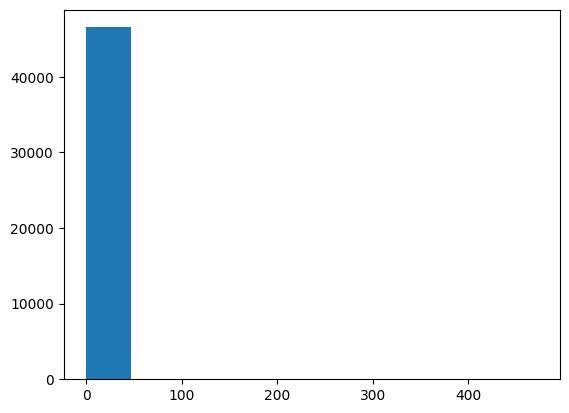

In [ ]:
plt.hist(x['txId2'])

(array([8.8070e+03, 2.4619e+04, 1.0280e+03, 3.1700e+02, 1.1600e+02,
        2.8000e+01, 4.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.        , 0.61590954, 1.23181908, 1.84772862, 2.46363816,
        3.07954769, 3.69545723, 4.31136677, 4.92727631, 5.54318585,
        6.15909539]),
 <BarContainer object of 10 artists>)

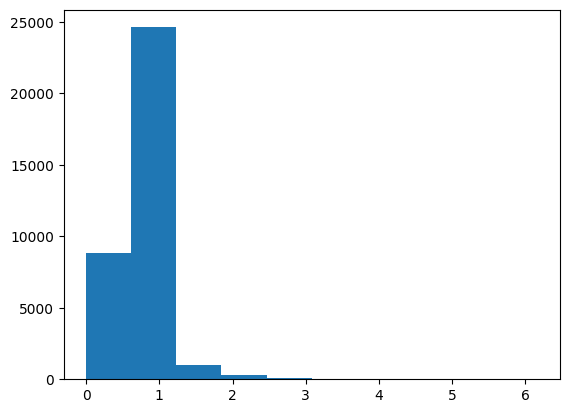

In [ ]:
plt.hist(x_train['txId2'])

In [ ]:
def create_test_model(metric):
  return_data = {
      "metric": metric,
      "loss": 0,
      "metric_result": 0,
      "ratio": 0
  }
  model = Sequential()

  model.add(LSTM(64, input_shape=(x_train.shape[1], 1)))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss=['binary_crossentropy'] , optimizer='adam', metrics=[metric])

  print("Training model with metric: ", metric)
  model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

  print("Evaluating model with metric: ", metric)
  loss, metric2 = model.evaluate(x_test, y_test)
  return_data["loss"] = loss
  return_data["metric_result"] = metric2

  y = classes[classes['class'] == 'unknown']
  x = features[features.iloc[:, 0].isin(y['txId'])]
  x = x.iloc[:, 2:]
  x.fillna(0, inplace=True)
  x['txId2']=x['txId2'].apply(lambda x: np.log(1+x))

  print("Predicting on model with metric: ", metric)
  result=model.predict(x)

  res=np.round(result)
  unique, counts = np.unique(res, return_counts=True)

  return_data["ratio"] = counts[1]/counts[0]
  print("Ratio for model with metric ", metric, " is :", return_data["ratio"])
  return return_data

In [ ]:
AUC_model = create_test_model("AUC")

Training model with metric:  AUC
Epoch 1/5
1092/1092 [==============================] - 15s 11ms/step - loss: 0.2969 - auc: 0.7035 - val_loss: 0.2302 - val_auc: 0.8648
Epoch 2/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.2455 - auc: 0.8129 - val_loss: 0.2540 - val_auc: 0.8177
Epoch 3/5
1092/1092 [==============================] - 12s 11ms/step - loss: 0.2052 - auc: 0.8557 - val_loss: 0.2075 - val_auc: 0.8515
Epoch 4/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.1909 - auc: 0.8787 - val_loss: 0.1725 - val_auc: 0.9186
Epoch 5/5
1092/1092 [==============================] - 16s 14ms/step - loss: 0.1629 - auc: 0.9171 - val_loss: 0.1558 - val_auc: 0.9343
Evaluating model with metric:  AUC
364/364 [==============================] - 2s 5ms/step - loss: 0.1558 - auc: 0.9343
Predicting on model with metric:  AUC
4913/4913 [==============================] - 20s 4ms/step
Ratio for model with metric  AUC  is : 0.035401435816373575


In [ ]:
Accuracy_model = create_test_model("Accuracy")

Training model with metric:  Accuracy
Epoch 1/5
1092/1092 [==============================] - 18s 14ms/step - loss: 0.3081 - Accuracy: 0.9026 - val_loss: 0.2981 - val_Accuracy: 0.9004
Epoch 2/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.2760 - Accuracy: 0.9035 - val_loss: 0.2311 - val_Accuracy: 0.9010
Epoch 3/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.1953 - Accuracy: 0.9322 - val_loss: 0.1781 - val_Accuracy: 0.9449
Epoch 4/5
1092/1092 [==============================] - 13s 12ms/step - loss: 0.1784 - Accuracy: 0.9426 - val_loss: 0.1995 - val_Accuracy: 0.9353
Epoch 5/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.1726 - Accuracy: 0.9463 - val_loss: 0.1579 - val_Accuracy: 0.9514
Evaluating model with metric:  Accuracy
364/364 [==============================] - 2s 5ms/step - loss: 0.1579 - Accuracy: 0.9514
Predicting on model with metric:  Accuracy
4913/4913 [==============================] - 20s 4ms/step
Ratio f

In [ ]:
Poisson_model = create_test_model("Poisson")

Training model with metric:  Poisson
Epoch 1/5
1092/1092 [==============================] - 15s 11ms/step - loss: 0.3076 - poisson: 0.3128 - val_loss: 0.3000 - val_poisson: 0.3072
Epoch 2/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.2394 - poisson: 0.2571 - val_loss: 0.1900 - val_poisson: 0.2223
Epoch 3/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.1809 - poisson: 0.2155 - val_loss: 0.1635 - val_poisson: 0.2063
Epoch 4/5
1092/1092 [==============================] - 14s 13ms/step - loss: 0.1595 - poisson: 0.2035 - val_loss: 0.1434 - val_poisson: 0.1962
Epoch 5/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.1623 - poisson: 0.2034 - val_loss: 0.1335 - val_poisson: 0.1877
Evaluating model with metric:  Poisson
364/364 [==============================] - 2s 6ms/step - loss: 0.1335 - poisson: 0.1877
Predicting on model with metric:  Poisson
4913/4913 [==============================] - 18s 4ms/step
Ratio for model with 

In [ ]:
Hinge_model = create_test_model("Hinge")

Training model with metric:  Hinge
Epoch 1/5
1092/1092 [==============================] - 15s 12ms/step - loss: 0.2971 - hinge: 1.0709 - val_loss: 0.3487 - val_hinge: 1.0505
Epoch 2/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.2385 - hinge: 1.0373 - val_loss: 0.1959 - val_hinge: 0.9970
Epoch 3/5
1092/1092 [==============================] - 12s 11ms/step - loss: 0.1896 - hinge: 1.0073 - val_loss: 0.1863 - val_hinge: 1.0002
Epoch 4/5
1092/1092 [==============================] - 12s 11ms/step - loss: 0.1860 - hinge: 1.0066 - val_loss: 0.1576 - val_hinge: 0.9931
Epoch 5/5
1092/1092 [==============================] - 12s 11ms/step - loss: 0.1806 - hinge: 1.0034 - val_loss: 0.1677 - val_hinge: 0.9903
Evaluating model with metric:  Hinge
364/364 [==============================] - 2s 6ms/step - loss: 0.1677 - hinge: 0.9903
Predicting on model with metric:  Hinge
4913/4913 [==============================] - 18s 4ms/step
Ratio for model with metric  Hinge  is : 0.067758

In [ ]:
Precision_model = create_test_model("Precision")

Training model with metric:  Precision
Epoch 1/5
1092/1092 [==============================] - 15s 12ms/step - loss: 0.3074 - precision: 0.0676 - val_loss: 0.2727 - val_precision: 0.0000e+00
Epoch 2/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.2254 - precision: 0.6736 - val_loss: 0.2010 - val_precision: 0.8730
Epoch 3/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.1894 - precision: 0.7493 - val_loss: 0.1688 - val_precision: 0.8459
Epoch 4/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.1698 - precision: 0.7890 - val_loss: 0.1621 - val_precision: 0.8689
Epoch 5/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.1659 - precision: 0.8064 - val_loss: 0.1573 - val_precision: 0.7801
Evaluating model with metric:  Precision
364/364 [==============================] - 2s 7ms/step - loss: 0.1573 - precision: 0.7801
Predicting on model with metric:  Precision
4913/4913 [==============================] - 18

In [ ]:
TruePositives_model = create_test_model("TruePositives")

Training model with metric:  TruePositives
Epoch 1/5
1092/1092 [==============================] - 15s 11ms/step - loss: 0.3177 - true_positives: 0.0000e+00 - val_loss: 0.3133 - val_true_positives: 0.0000e+00
Epoch 2/5
1092/1092 [==============================] - 12s 11ms/step - loss: 0.2534 - true_positives: 541.0000 - val_loss: 0.2007 - val_true_positives: 234.0000
Epoch 3/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.2132 - true_positives: 1105.0000 - val_loss: 0.2021 - val_true_positives: 602.0000
Epoch 4/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.1979 - true_positives: 1670.0000 - val_loss: 0.2444 - val_true_positives: 0.0000e+00
Epoch 5/5
1092/1092 [==============================] - 12s 11ms/step - loss: 0.1863 - true_positives: 1809.0000 - val_loss: 0.2009 - val_true_positives: 266.0000
Evaluating model with metric:  TruePositives
364/364 [==============================] - 2s 5ms/step - loss: 0.2009 - true_positives: 266.0000
P

### Analiza SHAP dla modelu z metryką Precision